# Loan Payback Prediction

### Description
* Built a machine learning model to predict whether a customer will repay a loan based on features like income, loan amount, credit history, employment type, and dependents. The workflow includes data cleaning, exploratory data analysis (EDA), encoding categorical variables, feature scaling, model training, and performance evaluation using metrics such as accuracy and F1-score.

### Step 1.Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix,ConfusionMatrixDisplay, roc_curve, auc)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Step 2.Importing the datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [4]:
test.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


### Step 3.Understand and analyse the dataset

In [5]:
train.shape

(593994, 13)

##### The train data contains **593994** observations across **13** parameters

In [6]:
test.shape

(254569, 12)

##### The test data contains **254569** observations across **12** parameters

#### 3.1 Verifiy the dataset has non-null values and duplicate entries

In [7]:
train.isna().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [8]:
test.isna().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
dtype: int64

In [9]:
train.duplicated().sum()

np.int64(0)

In [10]:
test.duplicated().sum()

np.int64(0)

##### Based on the analysis, both the training and test datasets do not contain any duplicate values and non-null values

#### 3.2 Descriptive Analystic

In [11]:
train.describe(include='all')

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994,593994,593994,593994,593994,593994,593994.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,4,5,5,8,30,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Female,Single,Bachelor's,Employed,Debt consolidation,C3,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,306175,288843,279606,450645,324695,58695,NaN
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,NaN,NaN,NaN,NaN,NaN,NaN,0.798820
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,NaN,NaN,NaN,NaN,NaN,NaN,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [12]:
test.describe(include='all')

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
count,254569.000000,254569.000000,254569.000000,254569.000000,254569.000000,254569.000000,254569,254569,254569,254569,254569,254569
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,4,5,5,8,30
top,NaN,NaN,NaN,NaN,NaN,NaN,Female,Single,Bachelor's,Employed,Debt consolidation,C3
freq,NaN,NaN,NaN,NaN,NaN,NaN,131480,123686,119924,193207,138963,25410
mean,721278.000000,48233.080193,0.120583,681.037691,15016.753484,12.352323,NaN,NaN,NaN,NaN,NaN,NaN
std,73487.884676,26719.658580,0.068582,55.624118,6922.165182,2.017602,NaN,NaN,NaN,NaN,NaN,NaN
min,593994.000000,6011.770000,0.011000,395.000000,500.050000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN
25%,657636.000000,27950.300000,0.072000,646.000000,10248.580000,10.980000,NaN,NaN,NaN,NaN,NaN,NaN
50%,721278.000000,46528.980000,0.096000,683.000000,15000.220000,12.370000,NaN,NaN,NaN,NaN,NaN,NaN
75%,784920.000000,61149.440000,0.156000,719.000000,18831.460000,13.690000,NaN,NaN,NaN,NaN,NaN,NaN


### Step 4.Preprocessing

#### 4.1 Data Transformation

In [13]:
train_cat_columns = train.select_dtypes(include='object').columns

for col in train_cat_columns:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]]))
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  int64  
 7   marital_status        593994 non-null  int64  
 8   education_level       593994 non-null  int64  
 9   employment_status     593994 non-null  int64  
 10  loan_purpose          593994 non-null  int64  
 11  grade_subgrade        593994 non-null  int64  
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 58.9 MB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254569 entries, 0 to 254568
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    254569 non-null  int64  
 1   annual_income         254569 non-null  float64
 2   debt_to_income_ratio  254569 non-null  float64
 3   credit_score          254569 non-null  int64  
 4   loan_amount           254569 non-null  float64
 5   interest_rate         254569 non-null  float64
 6   gender                254569 non-null  int64  
 7   marital_status        254569 non-null  int64  
 8   education_level       254569 non-null  int64  
 9   employment_status     254569 non-null  int64  
 10  loan_purpose          254569 non-null  int64  
 11  grade_subgrade        254569 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 23.3 MB


### Step 5.Exploratory Data Analysis (EDA)

#### 5.1 Correlation Between the features

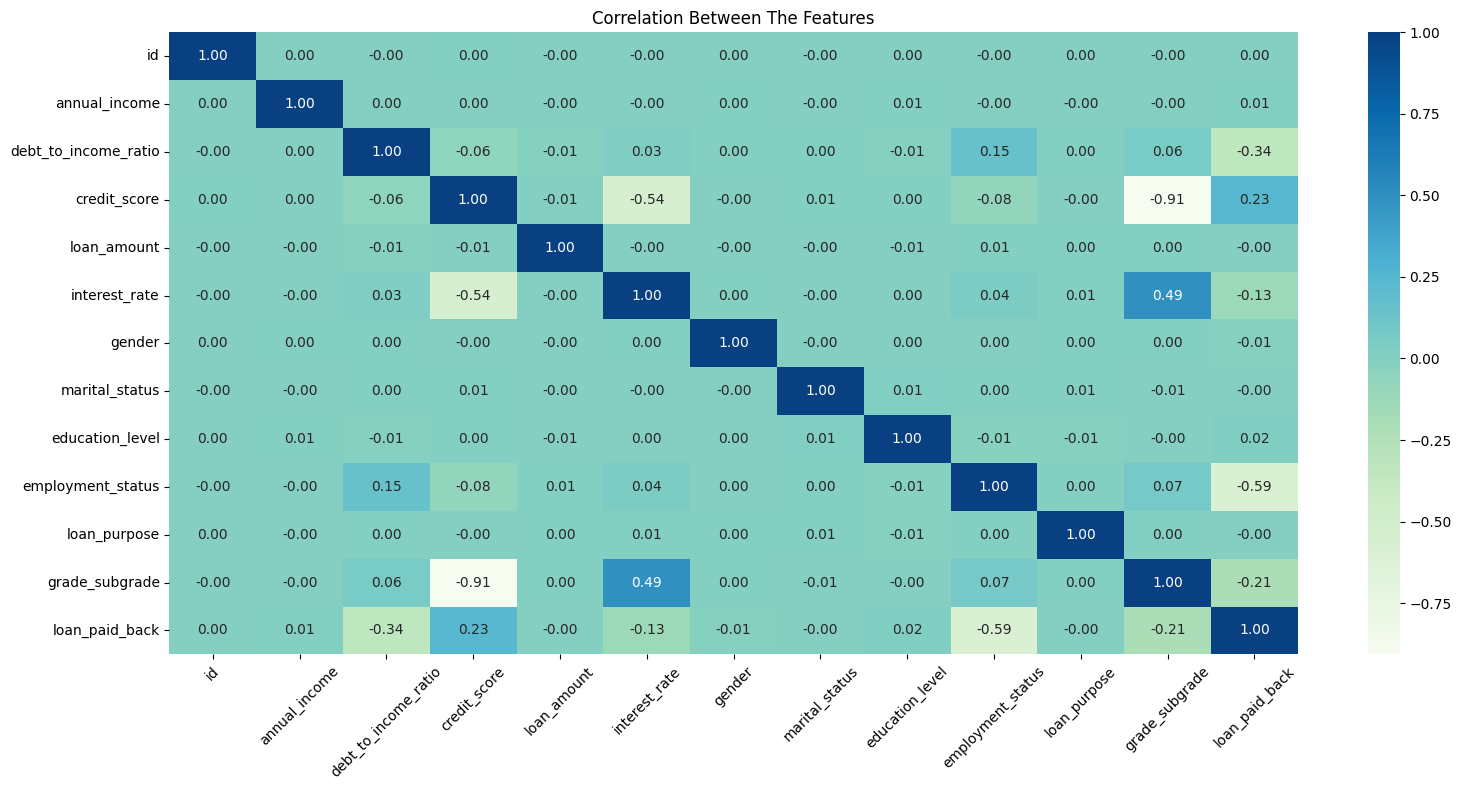

In [16]:
train_corr = train.corr()

plt.figure(figsize=(16,8))
sns.heatmap(train_corr, cmap='GnBu', annot=True, fmt='.2f')
plt.title('Correlation Between The Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Dimentionality Reduction

In [17]:
red_cols = ['annual_income','loan_amount','gender', 'marital_status','education_level','loan_purpose']

train = train.drop(columns=red_cols,axis=1)
test = test.drop(columns=red_cols,axis=1)

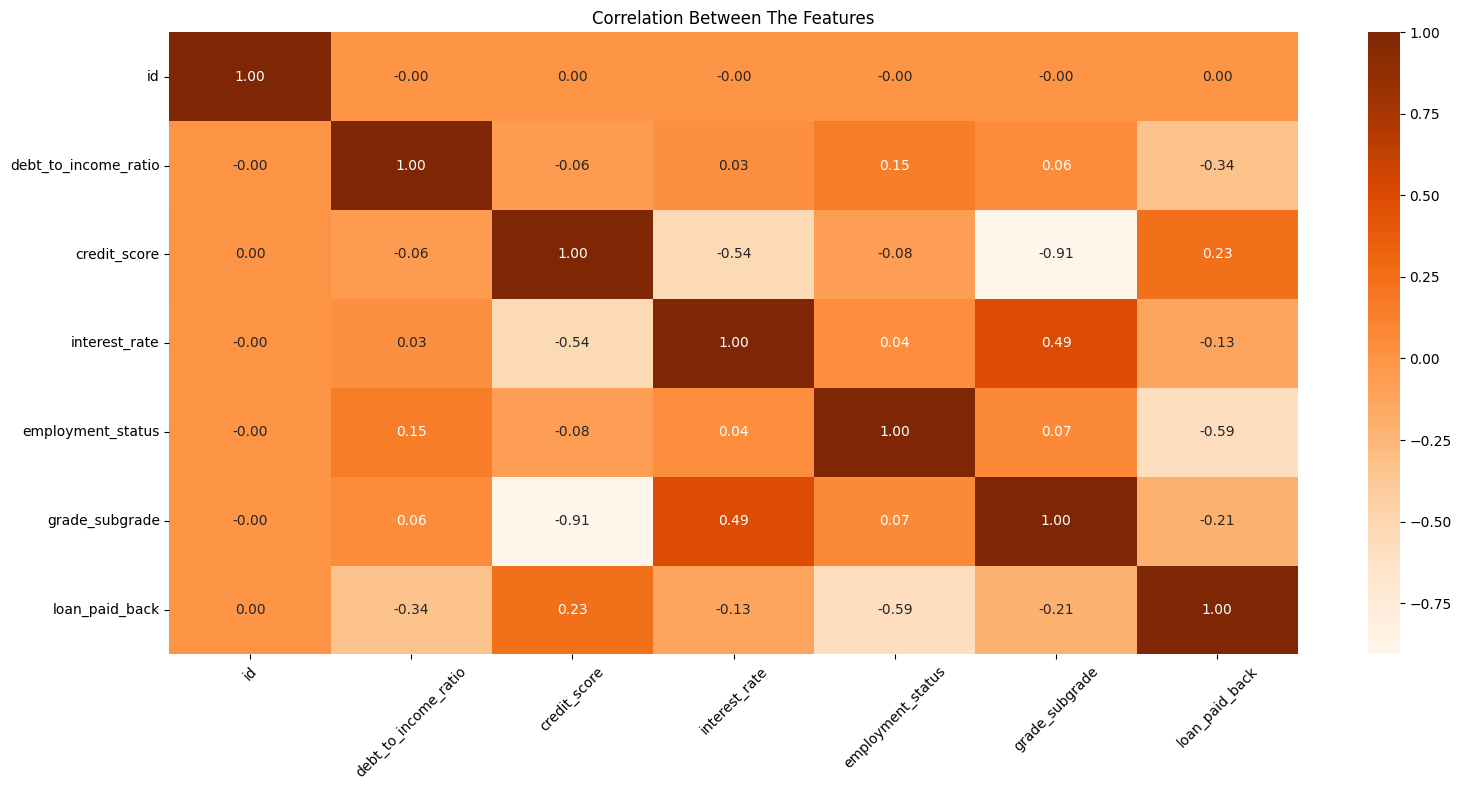

In [18]:
train_corr = train.corr()

plt.figure(figsize=(16,8))
sns.heatmap(train_corr, cmap='Oranges', annot=True, fmt='.2f')
plt.title('Correlation Between The Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
features = train.columns.tolist()
features

['id',
 'debt_to_income_ratio',
 'credit_score',
 'interest_rate',
 'employment_status',
 'grade_subgrade',
 'loan_paid_back']

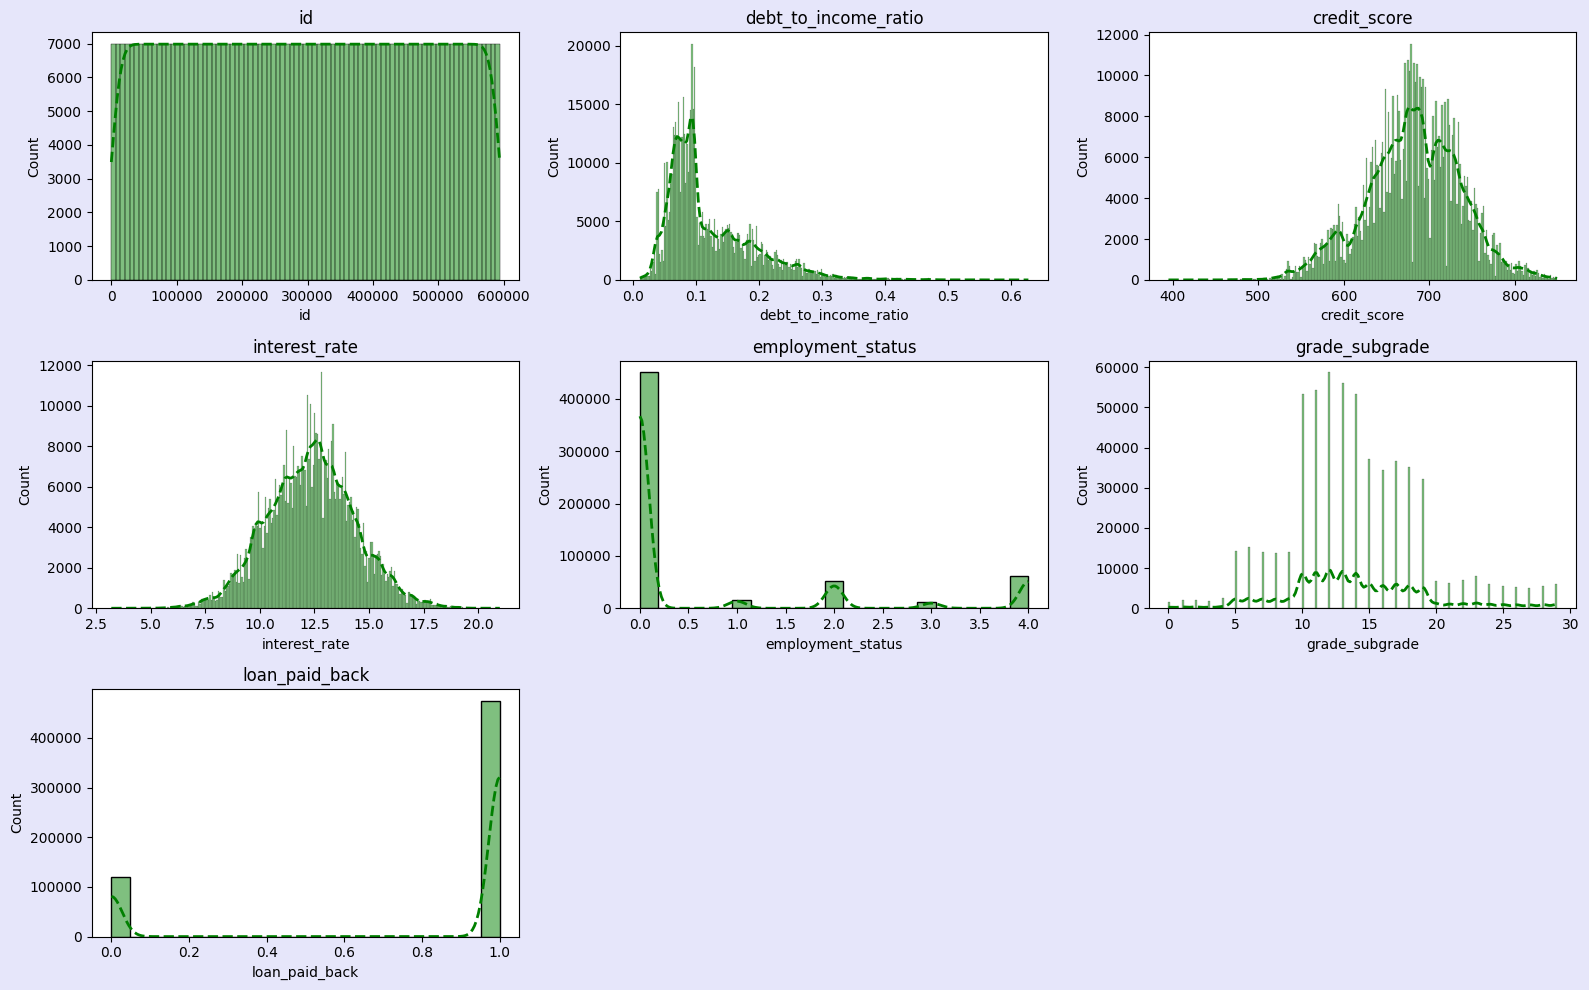

In [21]:
rows = 3
columns = 3

plt.figure(figsize=(16,10))

for i,f in enumerate(features,1):
    plt.subplot(rows, columns, i)
    sns.histplot(train[f], color='green', kde=True,line_kws={"linewidth": 2, "linestyle": "--"})
    plt.title(f)
plt.gcf().set_facecolor('lavender')
plt.tight_layout()
plt.show()

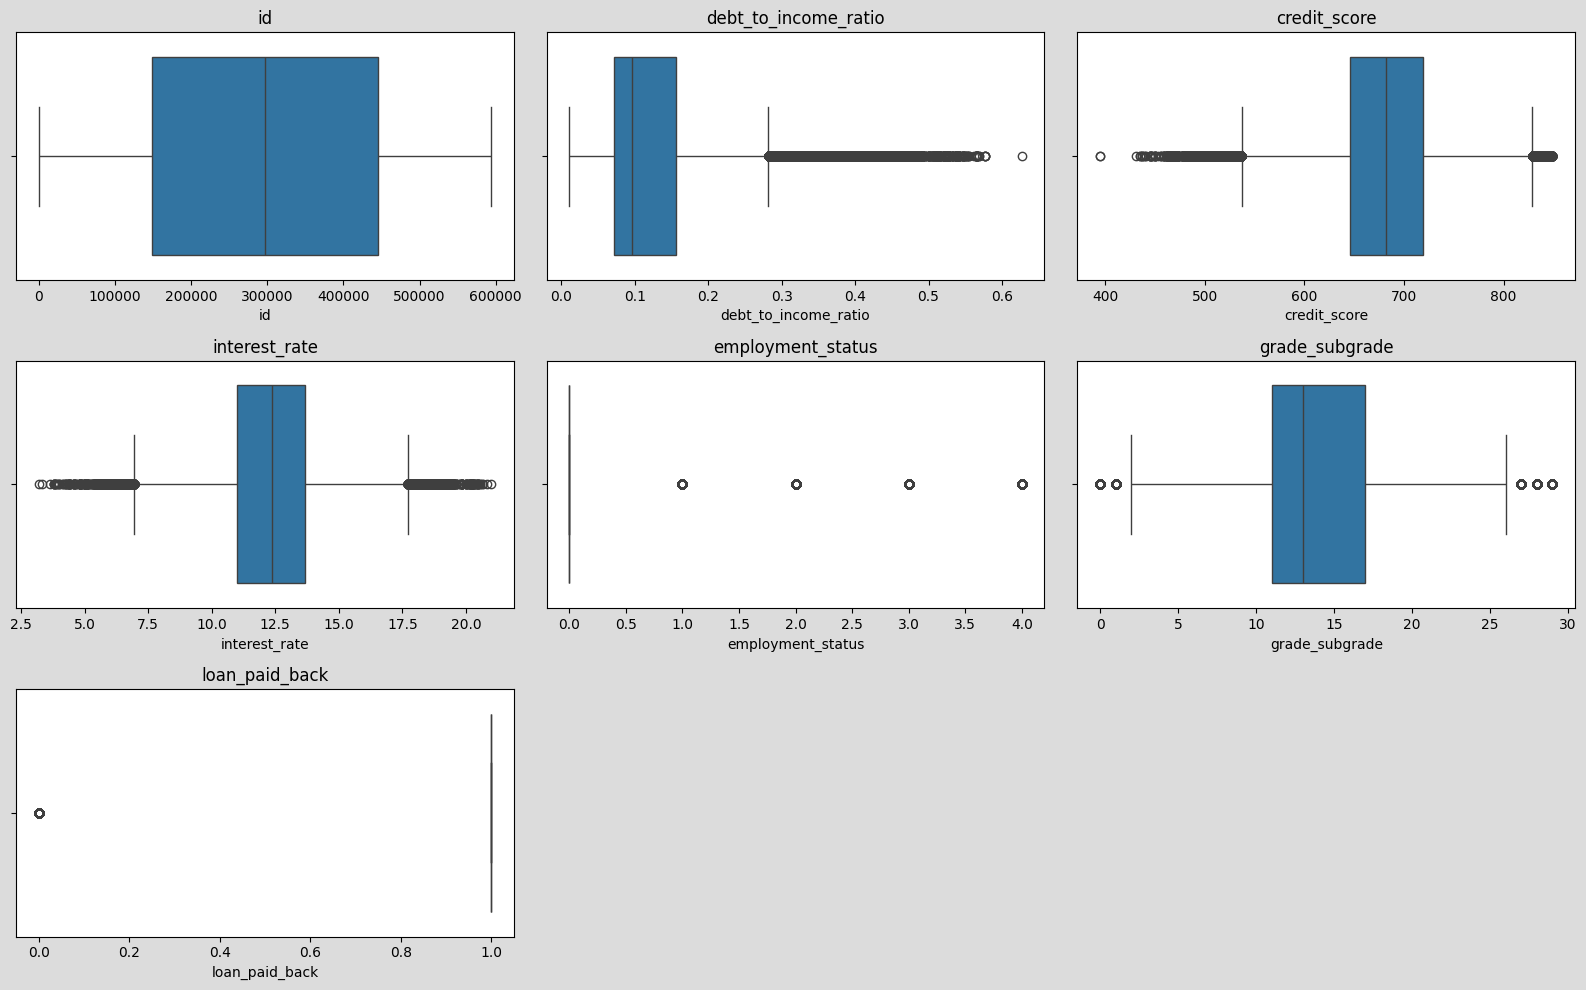

In [22]:
plt.figure(figsize=(16,10))

for i,f in enumerate(features,1):
    plt.subplot(rows, columns, i)
    sns.boxplot(x=train[f])
    plt.title(f)
plt.gcf().set_facecolor('gainsboro')
plt.tight_layout()
plt.show()

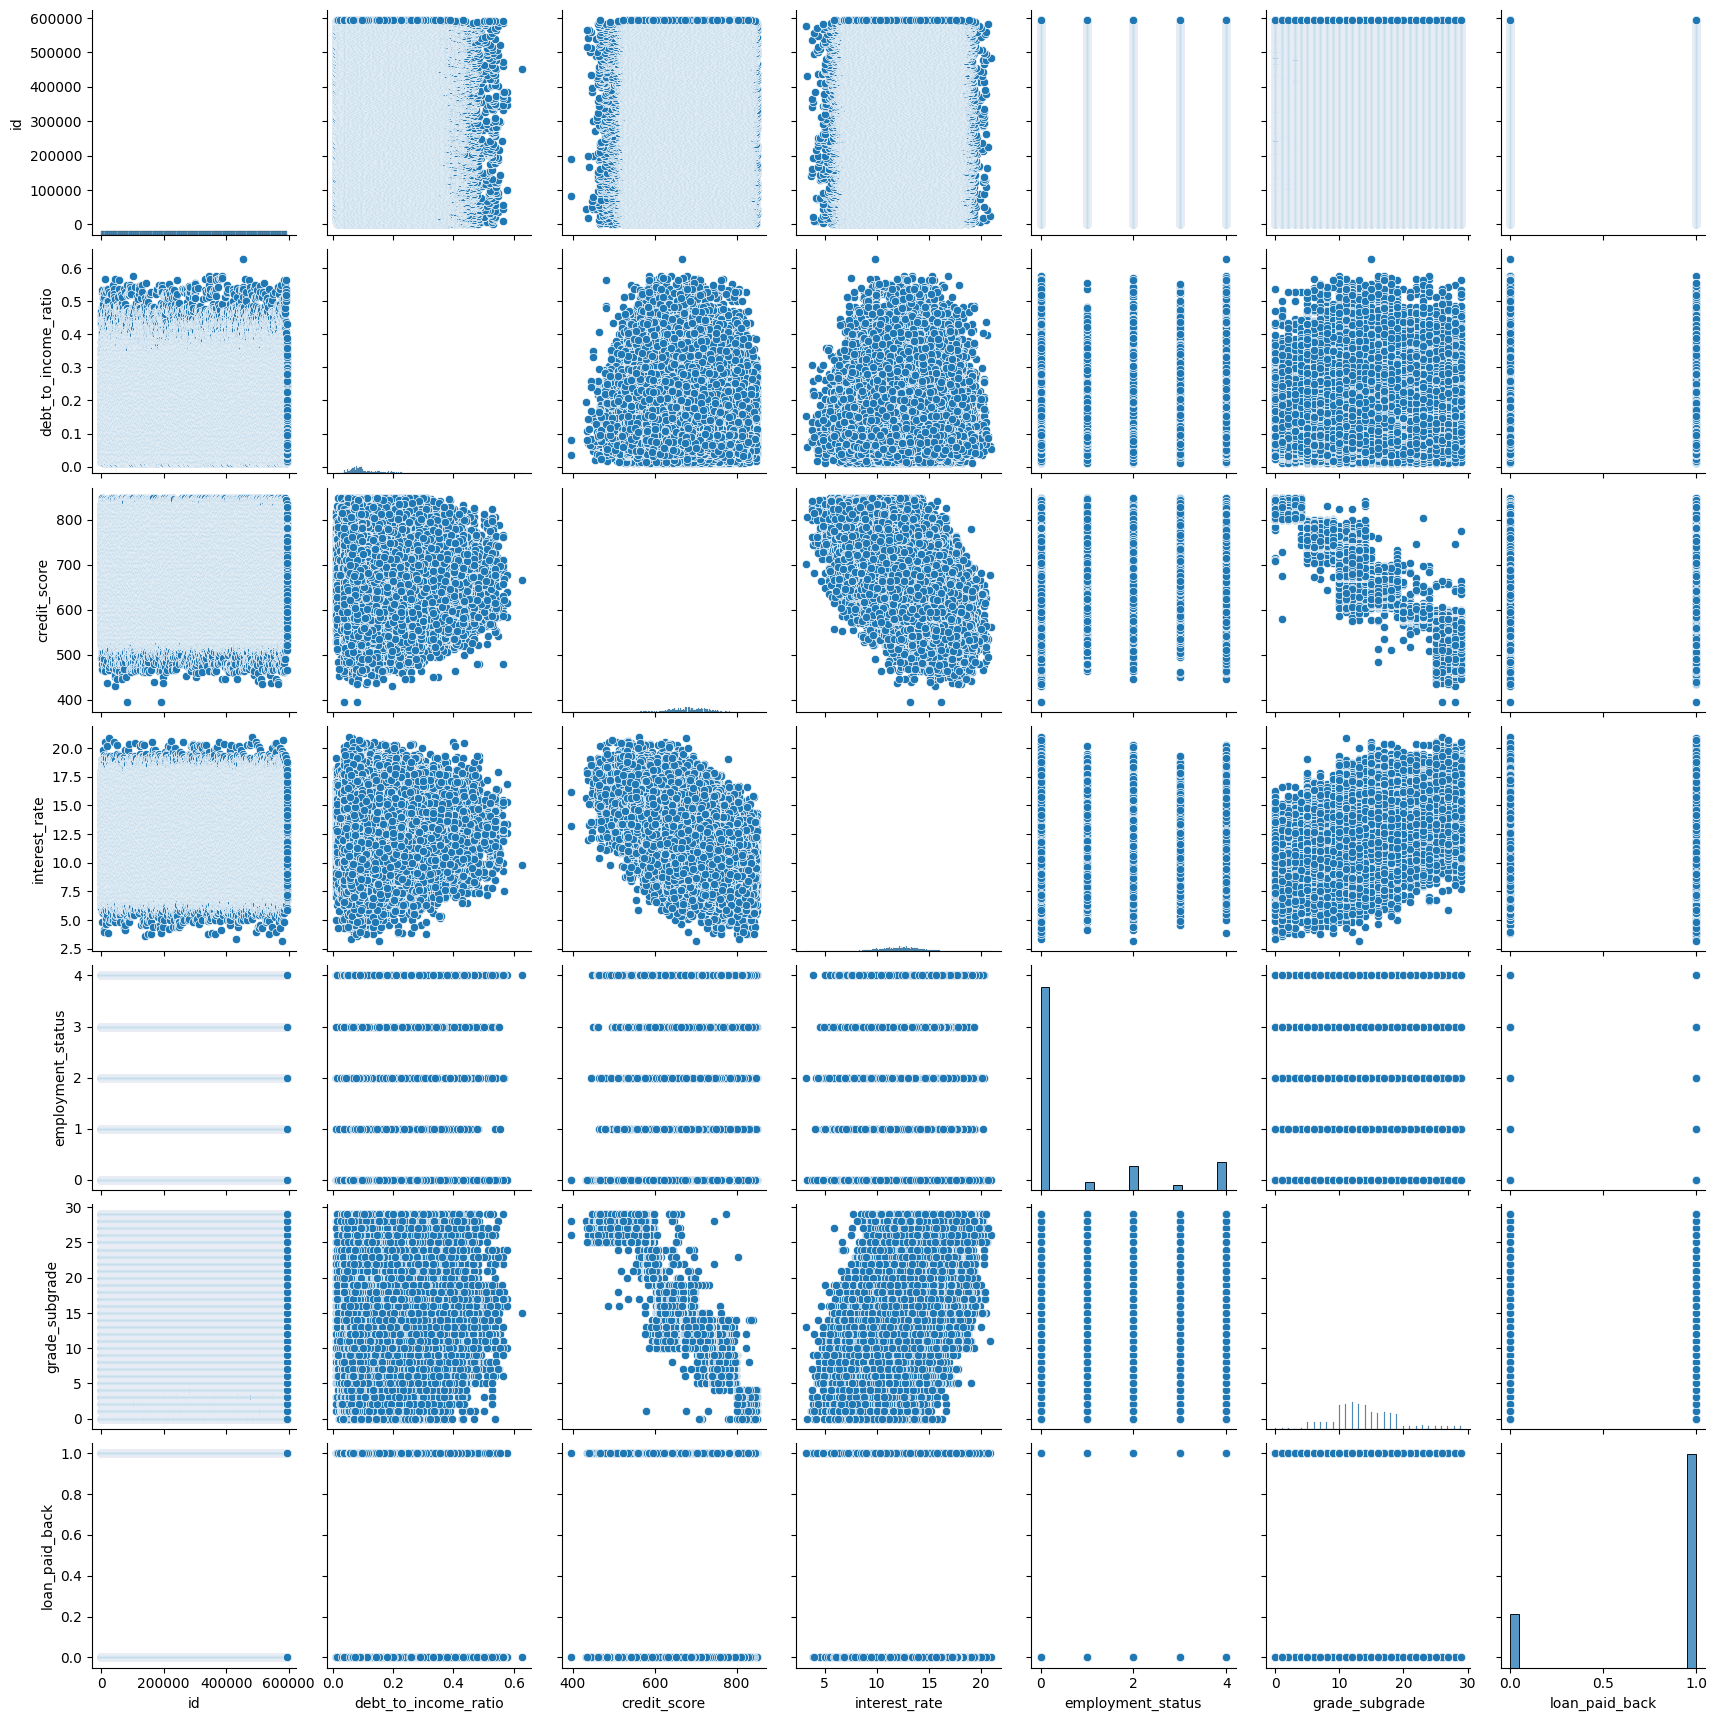

In [23]:
sns.pairplot(train)
plt.show()

### Step 6.Split the data into **Input Features** and **Target Variables**

In [24]:
X = train.drop('loan_paid_back', axis=1)
y = train['loan_paid_back']

### Step 6.Separate **Input Features** and **Target Values** for trainig and testing

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=42)

### Step 7.Model Building

In [26]:

model = LogisticRegression(max_iter=1000)

In [27]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [28]:
y_pred = model.predict(X_valid)

### Step 8.Evaluating The Model

#### 8.1 Evaluating Accuracy, Precision, Racall & F1_Score

In [29]:
accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
print(f'Accuracy Score :{accuracy*100:.2f}%')
print(f'F1 Score :{f1*100:.2f}%')
print(f'Precision Score :{precision*100:.2f}%')
print(f'Recall Score :{recall*100:.2f}%')

Accuracy Score :89.22%
F1 Score :93.46%
Precision Score :90.59%
Recall Score :96.52%


#### 8.2 Confusion Matrix 

Text(0.5, 1.0, 'Confusion Matrix - Loan Paid Back Prediction')

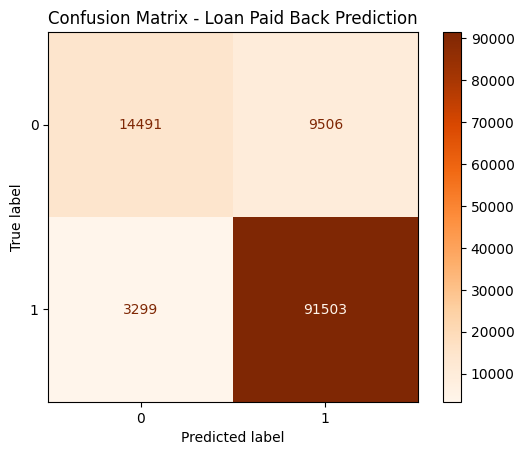

In [43]:
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix - Loan Paid Back Prediction")

#### 8.3 ROC Curve 

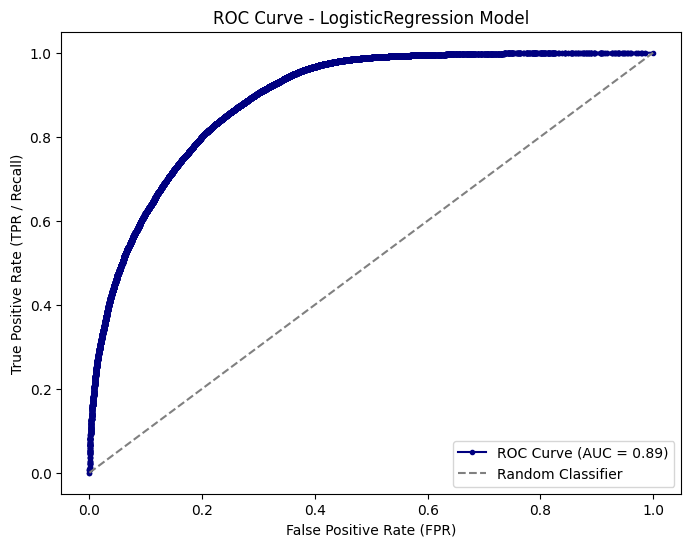

In [31]:
y_prob = model.predict_proba(X_valid)[:,1]
fpr, tpr, _ = roc_curve(y_valid, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,marker='.', color='navy', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray', label="Random Classifier")

plt.title("ROC Curve - LogisticRegression Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR / Recall)")
plt.legend()
plt.show()

### Step 9.Final Prediction

In [32]:
model = LogisticRegression(max_iter=1000)

In [33]:
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [39]:
final_prediction = model.predict(test)

In [40]:
submission = pd.DataFrame({
    'id': test['id'],
    'loan_paid_back': final_prediction
})

submission.to_csv('submission.csv', index=False)

In [41]:
output = pd.read_csv('submission.csv')
output

,id,loan_paid_back
0,593994,1.0
1,593995,1.0
2,593996,0.0
3,593997,1.0
4,593998,1.0
...,...,...
254564,848558,1.0
254565,848559,1.0
254566,848560,1.0
254567,848561,1.0


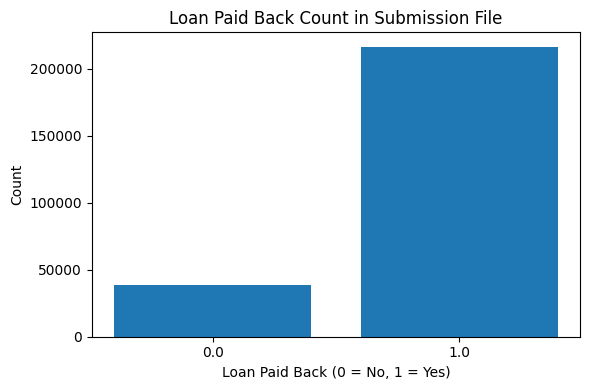

In [44]:
counts = output['loan_paid_back'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Loan Paid Back (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Loan Paid Back Count in Submission File")
plt.tight_layout()
plt.show()

In [45]:
output['loan_paid_back'].value_counts()

loan_paid_back
1.0    216332
0.0     38237
Name: count, dtype: int64

### Step 10.Conclusion

* Based on the given test data, **2,16,332** customers have paid the loan, while **38,237** customers have not yet paid.